# Logistic regression
This notebook introduces logistic regression, implementing each of the examples we saw in the course.

In [1]:
%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
def get_sample(N=50):
    b_boys = 2
    b_girls = .6    
    x_boys = np.random.uniform(10, 18, size=N//2)
    x_girls = np.random.uniform(10, 18, size=N//2)
    y_boys = [3.5*i + b_boys*(i) + np.random.normal(0,i//2) for i in x_boys]
    y_girls = [3.5*i + b_girls*(i) + np.random.normal(0,i//2) for i in x_girls]
    return x_boys, x_girls, y_boys, y_girls

In [4]:
def prepare(x_boys, x_girls, y_boys, y_girls):
    X1 = np.concatenate([x_boys, x_girls])
    X2 = np.concatenate([y_boys, y_girls])
    X = np.vstack([X1, X2]).T
    y = np.vstack([np.zeros(N//2), np.zeros(N//2)+1]).flatten()
    return X,y

In [5]:
# Generate data
# We have the height and weight of a bunch of young kids, and we must guess if they're a boy or a girl
N = 200
x_boys, x_girls, y_boys, y_girls = get_sample(N=N)
X,y = prepare(x_boys, x_girls, y_boys, y_girls)

# Split train and test
split = 100
train_ids = np.random.choice(np.arange(N), split, replace=False)
test_ids = np.delete(np.arange(N), train_ids)
X_train = X[train_ids,:]
y_train = y[train_ids]
X_test = X[test_ids,:]
y_test = y[test_ids]

In [6]:
# Train a logistic regression model
from sklearn.linear_model import  LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
w = np.concatenate([clf.coef_[0], clf.intercept_])
print('Predicted coefficients: {}' .format(w))

Predicted coefficients: [ 2.06073085 -0.43885214 -0.01732453]


In [7]:
# Predict a manually chosen instance
age = 12
weight = 59
x = np.array([age, weight]).reshape([1,2])
'Girl' if clf.predict(x) else 'Boy'

'Boy'

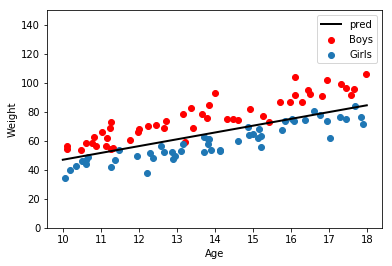

In [8]:
# compute reference points for plotting the separating hyperplane
a = -w[0]/w[1]
b = w[2]
w

fig = plt.figure()
ax = fig.gca()

boys = np.array([X_test[i] for i in range(X_test.shape[0]) if y_test[i] == 0])
girls = np.array([X_test[i] for i in range(X_test.shape[0]) if y_test[i] == 1])
ax.scatter(boys[:,0], boys[:,1], label='Boys', color='red')
ax.scatter(girls[:,0], girls[:,1], label='Girls')

xb = [10,18]
z = [a*x+b for x in xb]
ax.plot(xb, z, label='pred', color='black', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Weight')
ax.legend(loc='best')

ax.set_ylim(0,20)
ax.set_ylim(0,150)

plt.show()

#plt.savefig('../pres/images/logreg.pdf')

In [9]:
# Gradient ascent by hand
# first we choose a learning rate (alpha) and a random set of initial coefficients
# The algorithm is in the cell below
alpha = 0.005
X_train_1s = np.column_stack([X_train, np.ones(X_train.shape[0])])
w = np.random.rand(3)
print('Initial w: {}'.format(w))
iterated = 0

Initial w: [0.49234672 0.43574404 0.97959099]


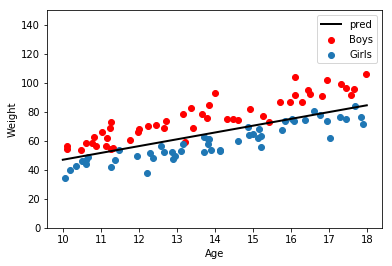

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Final w: [ 1.54328529 -0.34422635  1.05521698]


In [10]:
# Here we run gradient ascent
# Note that the coefficients might not converge to the same ones as scikit-learn estimated. That is because
# they use a different optimization algorithm. The corresponding hyperplane, however, is roughly the same.
# After 100 iterations or so, with decreasing learning rate, we should reach more or less the same solution
import time
ITERATIONS = 50

fig = plt.figure()
ax = fig.gca()
plt.ion()
boys = np.array([X_test[i] for i in range(X_test.shape[0]) if y_test[i] == 0])
girls = np.array([X_test[i] for i in range(X_test.shape[0]) if y_test[i] == 1])
ax.scatter(boys[:,0], boys[:,1], label='Boys', color='red')
ax.scatter(girls[:,0], girls[:,1], label='Girls')

xb = [10,18]
z = [a*x+b for x in xb]
ax.plot(xb, z, label='pred', color='black', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Weight')
ax.legend(loc='best')

ax.set_ylim(0,20)
ax.set_ylim(0,150)

plt.show()

for i in range(1,ITERATIONS):
    grad = np.sum([xi*(yi-sigmoid(w.T.dot(xi))) for xi,yi in zip(X_train_1s, y_train) ], axis=0)
    iterated += 1

    w = w+alpha/float(iterated)*grad
    alpha = alpha*0.9 # The learning rate can be shrinked to help convergence
    
    a = -w[0]/w[1]
    b = w[2]
    z = [a*x+b for x in xb]
    time.sleep(0.001) # Sleep to visualize the animation better

    ax.clear()
    ax.set_title(str(iterated))
    ax.set_ylim(0,20)
    ax.set_ylim(0,150)
    ax.scatter(boys[:,0], boys[:,1], label='Boys', color='red')
    ax.scatter(girls[:,0], girls[:,1], label='Girls')
    ax.plot(xb, z, label='pred', color='black', linewidth=2)
    fig.canvas.draw()    
    
print('Final w: {}'.format(w))

In [11]:
#Measure accuracy
preds = clf.predict(X_test)
print('Accuracy:  {}'.format(len(list(filter(lambda x: x[0] == x[1], zip(preds, y_test))))/ float(len(preds))))

from sklearn import metrics
print('Precision: {}'.format(metrics.precision_score(y_test, preds)))
print('Recall:    {}'.format(metrics.recall_score(y_test, preds)))
print('F1:        {}'.format(metrics.f1_score(y_test, preds)))


Accuracy:  0.96
Precision: 0.9795918367346939
Recall:    0.9411764705882353
F1:        0.96


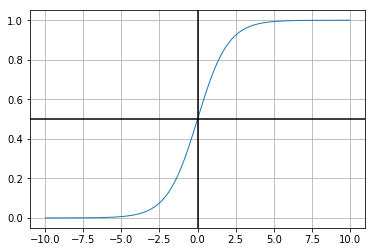

In [12]:
# A plot of the sigmoid function
fig = plt.figure()
ax = fig.gca()

xb = np.arange(-10,10,0.01)
z = [sigmoid(x) for x in xb]
ax.plot(xb, z, label='pred', linewidth=1)
ax.grid(True, which='both')
ax.axhline(y=0.5, color='k')
ax.axvline(x=0, color='k')

plt.show()
#plt.savefig('../pres/images/sigmoid.pdf')